In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf

In [39]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = test.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]
del train, test, valid

In [3]:
X_train.shape

(248260, 11)

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="softmax"))

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
y_train.shape

(248260,)

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9364 - loss: 0.1982 - val_accuracy: 0.9728 - val_loss: 0.0631
Epoch 2/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9721 - loss: 0.0643 - val_accuracy: 0.9738 - val_loss: 0.0611
Epoch 3/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9729 - loss: 0.0626 - val_accuracy: 0.9742 - val_loss: 0.0599
Epoch 4/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9734 - loss: 0.0614 - val_accuracy: 0.9746 - val_loss: 0.0590
Epoch 5/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9737 - loss: 0.0604 - val_accuracy: 0.9753 - val_loss: 0.0581
Epoch 6/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9743 - loss: 0.0594 - val_accuracy: 0.9760 - val_loss: 0.0571
Epoch 7/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9748 - loss: 0.0584 - val_accuracy: 0.9763 - val_loss: 0.0562
Epoch 8/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9753 - loss: 0

In [15]:
y_pred_valid = (model.predict(X_valid) >= 0.5)

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step


array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [22]:
(y_pred_valid[:, 1] == y_valid).mean()

np.float64(0.9800734707687846)

In [23]:
y_pred_valid = y_pred_valid[:, 1]

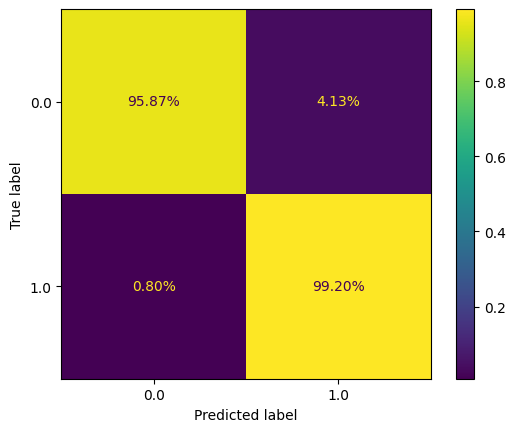

In [24]:
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [25]:
import pickle

In [26]:
with open("first_dnn.pkl", "wb") as file:
    pickle.dump(model, file)

In [33]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy", "f1_score"])

In [34]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9262 - f1_score: 0.4830 - loss: 0.1589 - val_accuracy: 0.9735 - val_f1_score: 0.5020 - val_loss: 0.0607
Epoch 2/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9730 - f1_score: 0.4994 - loss: 0.0616 - val_accuracy: 0.9753 - val_f1_score: 0.5006 - val_loss: 0.0572
Epoch 3/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9742 - f1_score: 0.4990 - loss: 0.0583 - val_accuracy: 0.9764 - val_f1_score: 0.5000 - val_loss: 0.0547
Epoch 4/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9753 - f1_score: 0.4987 - loss: 0.0557 - val_accuracy: 0.9771 - val_f1_score: 0.4998 - val_loss: 0.0529
Epoch 5/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9762 - f1_score: 0.4983 - loss: 0.0535 - val_accuracy: 0.9777 - val_f1_score: 0.4991 - val_loss: 0.0511
Epoch 6/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9770 - f1_score: 0.4979 - loss: 0.0515 - val_accuracy: 0.9780 - va

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


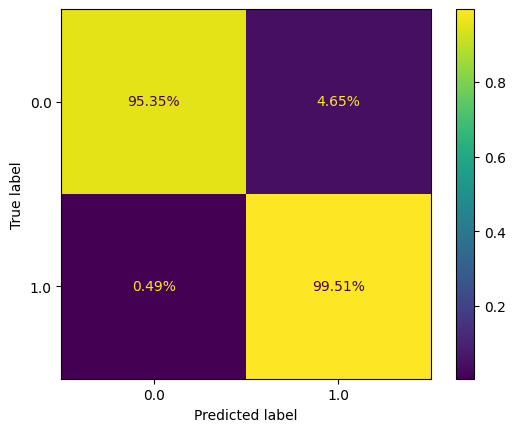

In [35]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [36]:
with open("first_dnn2.pkl", "wb") as file:
    pickle.dump(model, file)

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step


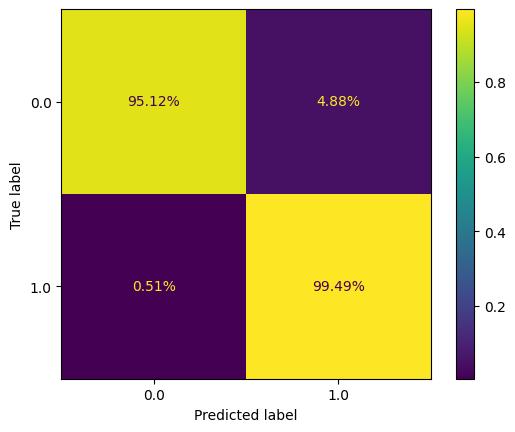

In [40]:
y_pred_valid = (model.predict(X_test) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [38]:
X_test.shape, y_test.shape

((248260, 11), (82754,))